<a href="https://colab.research.google.com/github/Slickkiddo/DL-professional-Certificate/blob/main/Every%20layer%20in%20detail%20CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import tensorflow as tf

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels), (testing_images, testing_labels) = mnist.load_data()

training_images = training_images.reshape(60000, 28, 28, 1)
testing_images = testing_images.reshape(10000, 28, 28, 1)
training_images, testing_images = training_images/255.0, testing_images/255.0

model = tf.keras.Sequential([tf.keras.layers.Conv2D(64, (3,3), activation="relu", input_shape = (28,28,1)),
                             tf.keras.layers.MaxPooling2D((2,2)),
                             tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
                             tf.keras.layers.MaxPooling2D((2,2)),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(units = 128, activation = tf.nn.relu),
                             tf.keras.layers.Dense(units = 10, activation = tf.nn.softmax)])
model.compile(optimizer = "adam", loss="sparse_categorical_crossentropy", metrics = ["accuracy"])
model.fit(training_images, training_labels, epochs=5)
model.evaluate(testing_images, testing_labels)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4423 - accuracy: 0.8393
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2993 - accuracy: 0.8907
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2530 - accuracy: 0.9068
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2196 - accuracy: 0.9179
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.2917 - accuracy: 0.8975


[0.2917026877403259, 0.8974999785423279]

In [10]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

In [7]:
print(testing_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


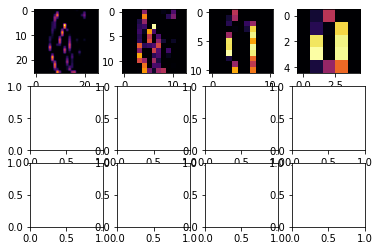

In [9]:
import matplotlib.pyplot as plt
from tensorflow.keras import models
f, axarr = plt.subplots(3,4)
f, s, t = 2,3,5
convolution_number = 1
output_layers = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = output_layers)
for x in range(0,4):
  f1 = activation_model.predict(testing_images[f].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, convolution_number], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(testing_images[s].reshape(1,28,28,1))[x]
  axarr[0,x].imshow(f2[0, : , :, convolution_number], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(testing_images[t].reshape(1,28,28,1))[x]
  axarr[0,x].imshow(f3[0, : , :, convolution_number], cmap='inferno')
  axarr[2,x].grid(False)